In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import balanced_accuracy_score
from datetime import datetime, date

%matplotlib inline

In [2]:
raw_df = pd.read_csv("data.csv")

### Exploratory Data Analysis

In [3]:
# View data
raw_df.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-84,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,Self employed,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-85,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-93,Self employed,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-77,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


In [4]:
raw_df.describe().round(3)

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,State_ID,Employee_code_ID,...,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO.OF_INQUIRIES,loan_default
count,233154.000,233154.000,233154.000,233154.000,233154.000,233154.000,233154.000,233154.000,233154.000,233154.000,...,233154.000,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,233154.000,233154.000,233154.000,233154.000,233154.000
mean,535917.573,54356.994,75865.068,74.747,72.936,19638.635,69.028,3396.880,7.262,1549.477,...,0.007,5.427793e+03,7.295923e+03,7.179998e+03,1.310548e+04,323.268,0.382,0.097,0.207,0.217
std,68315.694,12971.314,18944.781,11.457,69.835,3491.950,22.141,2238.148,4.482,975.261,...,0.111,1.702370e+05,1.831560e+05,1.825925e+05,1.513679e+05,15553.691,0.955,0.384,0.706,0.412
min,417428.000,13320.000,37000.000,10.030,1.000,10524.000,45.000,1.000,1.000,1.000,...,0.000,-5.746470e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000,0.000,0.000,0.000,0.000
25%,476786.250,47145.000,65717.000,68.880,14.000,16535.000,48.000,1511.000,4.000,713.000,...,0.000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000,0.000,0.000,0.000,0.000
50%,535978.500,53803.000,70946.000,76.800,61.000,20333.000,86.000,2970.000,6.000,1451.000,...,0.000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000,0.000,0.000,0.000,0.000
75%,595039.750,60413.000,79201.750,83.670,130.000,23000.000,86.000,5677.000,10.000,2362.000,...,0.000,0.000000e+00,0.000000e+00,0.000000e+00,1.999000e+03,0.000,0.000,0.000,0.000,0.000
max,671084.000,990572.000,1628992.000,95.000,261.000,24803.000,156.000,7345.000,22.000,3795.000,...,8.000,3.603285e+07,3.000000e+07,3.000000e+07,2.564281e+07,4170901.000,35.000,20.000,36.000,1.000


In [5]:
raw_df.dtypes.sort_values(ascending=True)

UniqueID                                 int64
PRI.NO.OF.ACCTS                          int64
PRI.ACTIVE.ACCTS                         int64
PRI.OVERDUE.ACCTS                        int64
PRI.CURRENT.BALANCE                      int64
PRI.SANCTIONED.AMOUNT                    int64
PRI.DISBURSED.AMOUNT                     int64
SEC.NO.OF.ACCTS                          int64
NO.OF_INQUIRIES                          int64
SEC.ACTIVE.ACCTS                         int64
SEC.CURRENT.BALANCE                      int64
SEC.SANCTIONED.AMOUNT                    int64
SEC.DISBURSED.AMOUNT                     int64
PRIMARY.INSTAL.AMT                       int64
SEC.INSTAL.AMT                           int64
NEW.ACCTS.IN.LAST.SIX.MONTHS             int64
DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS      int64
SEC.OVERDUE.ACCTS                        int64
PERFORM_CNS.SCORE                        int64
loan_default                             int64
Driving_flag                             int64
disbursed_amo

In [6]:
loan = raw_df.loan_default.value_counts().to_frame().rename(columns={"loan_default":"absolute"})
loan["percent"] = (loan.apply(lambda x: x/x.sum()*100).round(2))
display(loan)

,absolute,percent
0,182543,78.29
1,50611,21.71


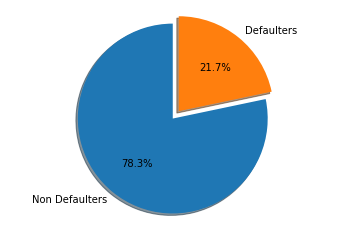

In [7]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Non Defaulters', 'Defaulters'
sizes = list(raw_df['loan_default'].astype(bool).value_counts())
explode = (0, 0.1)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

plt.show()

Notice that the data is highly unbalanced and thus we will need to balance the data before it is fitted on to the model.

### Balance data

We shall balance the data by upsampling the minority group

In [8]:
print('Before Resampling:')
print(raw_df['loan_default'].value_counts())
df_majority = raw_df[raw_df['loan_default']==0]
df_minority = raw_df[raw_df['loan_default']==1]


df_minority_upsampled = resample(df_minority, 
                                 replace=True,                  # sample with replacement
                                 n_samples=len(df_majority),    # to match majority class
                                 random_state=123)              # reproducible results
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
print('After Resampling:')
print(df_upsampled['loan_default'].value_counts())

Before Resampling:
0    182543
1     50611
Name: loan_default, dtype: int64
After Resampling:
0    182543
1    182543
Name: loan_default, dtype: int64


In [9]:
# Check for missing values
df_upsampled.isnull().sum().to_frame().rename(columns={0:"Missing Values"})

,Missing Values
UniqueID,0
disbursed_amount,0
asset_cost,0
ltv,0
branch_id,0
supplier_id,0
manufacturer_id,0
Current_pincode_ID,0
Date.of.Birth,0
Employment.Type,11875


Employment type has missing values which need to be taken care of during pre-processing

### Data pre-processing 

In [10]:
# Conver year, months to year float
def convert_years_months_to_float(yearmonth):
    split_per = yearmonth.split(' ')
    years = split_per[0][:-3]
    months = split_per[1][:-3]
    return int(years) + int(months)/12

In [11]:
# Get age from DOB and drop DOB. We are likely to get more insights from age as compared to DOB.
def calculateAge(birthDate):
    birthDate = datetime.strptime(birthDate, "%d-%m-%y").date()
    today = date.today()
    age = today.year - birthDate.year - ((today.month, today.day) < (birthDate.month, birthDate.day))
    return age

In [12]:
df_upsampled['Age'] = df_upsampled['Date.of.Birth'].apply(calculateAge)
df_upsampled = df_upsampled.drop('Date.of.Birth',axis=1)

df_upsampled['AVERAGE_ACCT_AGE'] = df_upsampled['AVERAGE.ACCT.AGE'].apply(convert_years_months_to_float)
df_upsampled = df_upsampled.drop('AVERAGE.ACCT.AGE',axis=1)

df_upsampled['CREDIT_HISTORY_LENGTH'] = df_upsampled['CREDIT.HISTORY.LENGTH'].apply(convert_years_months_to_float)
df_upsampled = df_upsampled.drop('CREDIT.HISTORY.LENGTH',axis=1)

We have observed that Employment type has missing values. We need to handle that.

In [13]:
df_upsampled['Employment.Type'] = df_upsampled['Employment.Type'].fillna("Missing")

In [14]:
df_upsampled.MobileNo_Avl_Flag.value_counts()

1    365086
Name: MobileNo_Avl_Flag, dtype: int64

In [15]:
df_upsampled['SEC.OVERDUE.ACCTS'].value_counts()

0    363048
1      1684
2       211
3        85
4        32
5        14
6        10
8         1
7         1
Name: SEC.OVERDUE.ACCTS, dtype: int64

In [16]:
#Correlation Matrix calculation
corr_mat = df_upsampled.corr()
corr_mat['loan_default'].sort_values(ascending = False)

loan_default                           1.000000
ltv                                    0.123027
disbursed_amount                       0.095516
State_ID                               0.058374
VoterID_flag                           0.052043
NO.OF_INQUIRIES                        0.047991
PRI.OVERDUE.ACCTS                      0.047494
DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS    0.040104
UniqueID                               0.038315
branch_id                              0.036023
Current_pincode_ID                     0.034228
supplier_id                            0.033599
Employee_code_ID                       0.027389
asset_cost                             0.016631
Age                                    0.008212
PAN_flag                               0.003469
SEC.OVERDUE.ACCTS                     -0.000975
SEC.INSTAL.AMT                        -0.003588
Driving_flag                          -0.005962
PRI.DISBURSED.AMOUNT                  -0.006191
PRI.SANCTIONED.AMOUNT                 -0

In [17]:
# We shall use the upsampled dataframe for model training
df = df_upsampled
df.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Employment.Type,DisbursalDate,...,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO.OF_INQUIRIES,loan_default,Age,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH
0,420825,50578,58400,89.55,67,22807,45,1441,Salaried,03-08-18,...,0,0,0,0,0,0,0,37,0.000000,0.000000
2,417566,53278,61360,89.63,67,22807,45,1497,Self employed,01-08-18,...,0,0,0,0,0,0,0,36,0.000000,0.000000
5,518279,54513,61900,89.66,67,22807,45,1501,Self employed,19-09-18,...,0,1347,0,0,0,0,0,31,1.750000,2.000000
6,529269,46349,61500,76.42,67,22807,45,1502,Salaried,23-09-18,...,0,0,0,0,0,0,0,33,0.000000,0.000000
7,510278,43894,61900,71.89,67,22807,45,1501,Salaried,16-09-18,...,0,0,0,0,0,0,0,32,0.166667,0.166667


### Drop columns that offer very little or no information in training the models

We need to drop columns that will not help the model
1. The UniqueID is only an identifier.
2. The MobileNo_Avl_Flag contains the same value all through.
3. DisbursalDate: Logically, we do not expect a lot from the date a loan was disbursed.
4. Employee_code_ID: The employee of the organization who logged the disbursement will not help much in predicting default.
5. SEC.OVERDUE.ACCTS: 99% of the values are 0. Very little information can be obtained.
6. PERFORM_CNS.SCORE.DESCRIPTION: This is a categorical version (description) of PERFORM_CNS.SCORE. We better work with the number.

In [18]:
columns_to_drop = ['UniqueID','MobileNo_Avl_Flag','DisbursalDate','SEC.OVERDUE.ACCTS', 'Employee_code_ID',\
                   'PERFORM_CNS.SCORE.DESCRIPTION', 'branch_id', 'supplier_id', 'manufacturer_id', 'Current_pincode_ID']
df=df.drop(columns=columns_to_drop)

In [19]:
df.dtypes.value_counts()

int64      27
float64     3
object      1
dtype: int64

#### Encode the categorical value Employment Type

In [20]:
df["Employment.Type"] = df["Employment.Type"].astype('category')
df["Employment.Type_cat"] = df["Employment.Type"].cat.codes
df = df.drop(columns=["Employment.Type"])

In [21]:
df.dtypes.value_counts()

int64      27
float64     3
int8        1
dtype: int64

#### Separate the predicted from predictors

In [22]:
X =df.drop('loan_default',axis=1)
y = df['loan_default']  

In [23]:
X_Columns = X.columns

### Scaling Data
We shall use MinMax Scaler to scale the data and also take care of extreme values

In [24]:
scaler = preprocessing.StandardScaler()
scaler.fit(X)

StandardScaler()

In [25]:
X_scaled = scaler.transform(X)

In [26]:
X_df = pd.DataFrame(X_scaled, columns=X_Columns)

## Split data
We shall split the data to obtain a test size of 20%

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_df,y, test_size=0.2, random_state=0)

# Model Training and testing

### Logistic Regression Classifier

In [28]:
# Fit the model on the training dataset
LRclf = LogisticRegression(C=1.0, class_weight=None,fit_intercept=True,max_iter=100)
LRclf.fit(X_train, y_train)

LogisticRegression()

###### Evaluate Model Performance

In [29]:
LRclf_predicted = LRclf.predict(X_test)
LRclf_score = balanced_accuracy_score(LRclf_predicted, y_test)
print('Accuracy of the Logistic Regression Classifier = {:0.2f}%'.format(LRclf_score*100))

Accuracy of the Logistic Regression Classifier = 58.97%


###### Check out confusion matrix

In [30]:
TN, FP, FN, TP = confusion_matrix(y_test, LRclf_predicted).ravel()

print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

True Positive(TP)  =  23087
False Positive(FP) =  16885
True Negative(TN)  =  19889
False Negative(FN) =  13157


### Decision Tree Classifier

In [31]:
# Fit the model on the training dataset
DTclf  = DecisionTreeClassifier()
DTclf.fit(X_train, y_train)

DecisionTreeClassifier()

###### Evaluate Model Performance

In [32]:
DTclf_predicted = DTclf.predict(X_test)
DTclf_score = balanced_accuracy_score(DTclf_predicted, y_test)
print('Accuracy of the Decision Tree Classifier = {:0.2f}%'.format(DTclf_score*100))

Accuracy of the Decision Tree Classifier = 87.41%


In [33]:
TN, FP, FN, TP = confusion_matrix(y_test, DTclf_predicted).ravel()

print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

True Positive(TP)  =  34820
False Positive(FP) =  8878
True Negative(TN)  =  27896
False Negative(FN) =  1424


### Random Forest Classifier

In [34]:
RFclf = RandomForestClassifier()
RFclf.fit(X_train, y_train)

RandomForestClassifier()

In [35]:
RFclf_predicted = RFclf.predict(X_test)
RFclf_score = balanced_accuracy_score(RFclf_predicted, y_test)
print('Accuracy of the Random Forest Classifier = {:0.2f}%'.format(RFclf_score*100))

Accuracy of the Random Forest Classifier = 93.02%


In [36]:
TN, FP, FN, TP = confusion_matrix(y_test, RFclf_predicted).ravel()

print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

True Positive(TP)  =  34583
False Positive(FP) =  3504
True Negative(TN)  =  33270
False Negative(FN) =  1661


The Random Forest Classifier has done excellent. An accuracy of 93% is good enough. It also min

### Using probalities from Random Forest Classifier, the business can set their own threshhold.

In [37]:
preds = RFclf.predict(X_test)

In [38]:
Test_df = X_test.copy()

In [39]:
# To get the probabilities we use predict_proba on the fitted model
probs = RFclf.predict_proba(X_test)

In [40]:
y_test_list = list(y_test)
preds_list = list(preds)
probs_list = list(probs)
Test_df['Loan_Default'] = y_test_list
Test_df['Loan_Default_Pred'] = preds_list
Test_df['Loan_Default_Prob'] = probs_list

In [41]:
Test_df.head()

,disbursed_amount,asset_cost,ltv,State_ID,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,...,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO.OF_INQUIRIES,Age,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,Employment.Type_cat,Loan_Default,Loan_Default_Pred,Loan_Default_Prob
301609,1.100024,1.082083,-0.152200,-0.978048,0.453485,-0.287228,-0.429438,-0.152795,-0.043102,-0.831633,...,-0.387211,-0.264852,-0.302482,-0.027533,-0.580400,-0.560035,0.848616,1,1,"[0.13, 0.87]"
283735,0.582631,0.094523,0.763249,1.238685,0.453485,-0.287228,-0.429438,-0.152795,-0.043102,-0.831633,...,-0.387211,-0.264852,-0.302482,0.456598,-0.580400,-0.560035,0.848616,1,1,"[0.25, 0.75]"
259021,-0.091461,-0.361139,0.327578,1.238685,-2.205146,3.481560,2.328622,-0.152795,-0.043102,-0.831633,...,-0.387211,-0.264852,-0.302482,0.016479,-0.580400,-0.560035,0.848616,1,1,"[0.11, 0.89]"
84230,0.543594,-0.267184,1.189018,-0.756375,0.453485,-0.287228,-0.429438,-0.152795,-0.043102,0.539182,...,0.679287,-0.264852,-0.302482,0.940729,0.425493,0.785236,0.848616,0,0,"[0.63, 0.37]"
228741,-0.117039,-0.419496,0.468901,0.351992,0.453485,-0.287228,-0.429438,-0.152795,-0.043102,1.491221,...,0.679287,-0.264852,-0.302482,-0.203580,-0.312162,-0.414601,-2.717859,1,1,"[0.01, 0.99]"


## Other Useful accuracy Metrics

#### ROC Curve

In [42]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, RFclf_predicted)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.9294435064751841

#### Brier Score Loss

The Brier score measures the mean squared difference between the predicted probability and the actual outcome. Since the output is in term of probabilities and is intended for binary classification, brier score loss is a good metric to use to measure model accuracy. The smaller the Brier Score loss, the better the model.

In [43]:
from sklearn.metrics import brier_score_loss

In [44]:
probs = RFclf.predict_proba(X_test)[:, 1]
RFclf_score = brier_score_loss(y_test, probs)
print("Brier Score Loss: %1.3f" % RFclf_score)

Brier Score Loss: 0.074


A Brier Score of 0.075 is quite close to 0 and shows that the model is performing well.

In [45]:
confusion_matrix = pd.crosstab(y_test, RFclf_predicted, rownames=['Actual'], colnames=['Predicted'])
print (confusion_matrix)

Predicted      0      1
Actual                 
0          33270   3504
1           1661  34583
